## PRODIGY_DS_TASK02

PERFORM DATA CLEANING AND EXPLORATORY DATA ANALYSIS ON A DATA SET OF YOUR CHOICE . 
EXPLORE THE RELATIONSHIPS BETWEEN VARIABLES AND IDENTIFY PATTERNS AND TRENDS IN THE DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df1=pd.read_csv(r'C:\Users\Shreya Tripathy\Desktop\visual code\Microsoft VS Code\train.csv')
df2=pd.read_csv(r'C:\Users\Shreya Tripathy\Desktop\visual code\Microsoft VS Code\test.csv')
df=pd.concat([df1,df2])
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
print(df.isnull().sum())

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


In [16]:
df['Age'].fillna(df['Age'].median(),inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [17]:
df['Sex']=df['Sex'].map({'female':0, 'male':1})
df['Embarked']=df['Embarked'].map({'c':0,'Q':1, 'S':2})

In [18]:
df['Age']=np.where(df['Age'] > df['Age'].quantile(0.99), df['Age'].median(), df['Age'])
df['Fare']=np.where(df['Fare'] > df['Fare'].quantile(0.99), df['Fare'].median(), df['Fare'])

In [19]:
df['Deck']=df['Cabin'].str.slice(0,1)
df['Deck']=df['Cabin'].fillna('Unknown')

In [20]:
df['HasCabin']=df['Cabin'].notnull().astype(int)

In [21]:
df['FamilySize']=df['SibSp']+df['Parch']+1

In [22]:
age_bins=[0,12,18,30,50,100]
age_labels=['Child','Teen','Young adult','Adult','Senior']
df['AgeGroup']=pd.cut(df['Age'], bins=age_bins, labels=age_labels)

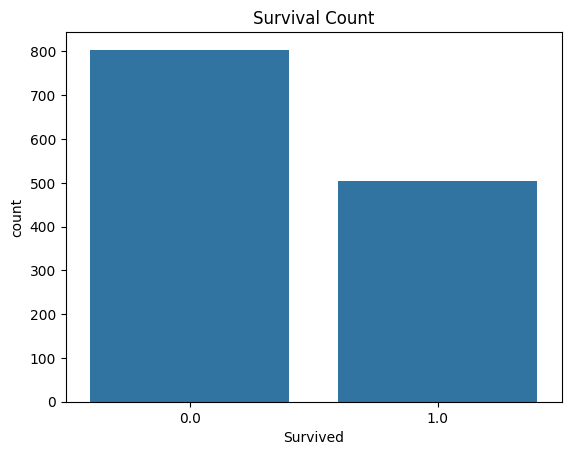

In [23]:

sns.countplot(x='Survived',data=df)
plt.title('Survival Count')
plt.show()

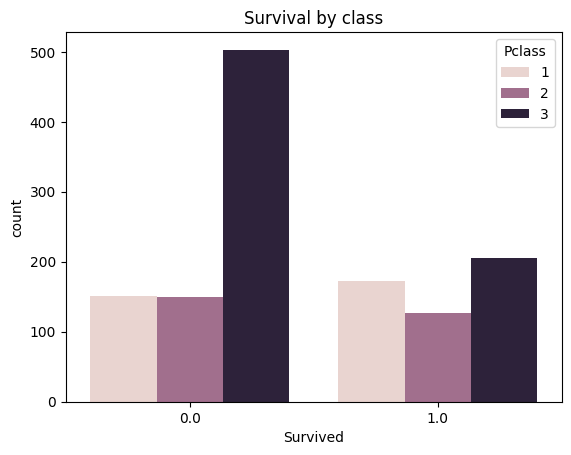

In [24]:
sns.countplot(x='Survived',hue='Pclass', data=df)
plt.title('Survival by class')
plt.show()

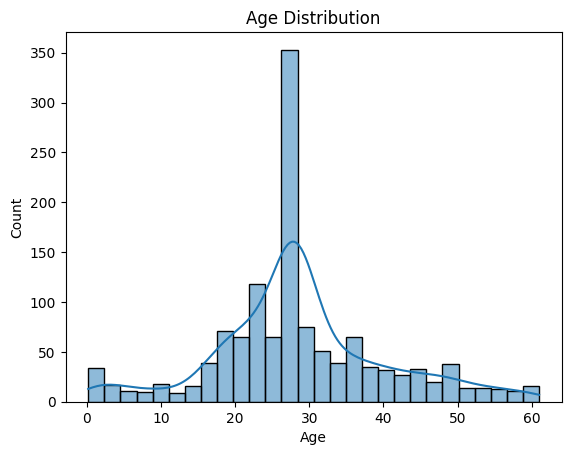

In [25]:
sns.histplot(x='Age', data=df, kde=True)
plt.title('Age Distribution')
plt.show()

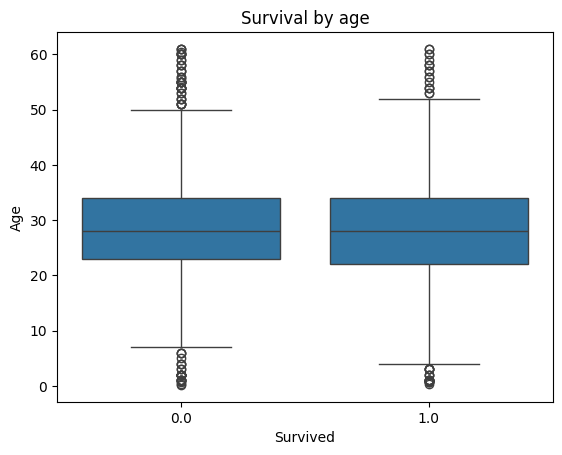

In [27]:
sns.boxplot(x='Survived',y='Age',data=df)
plt.title('Survival by age')
plt.show()

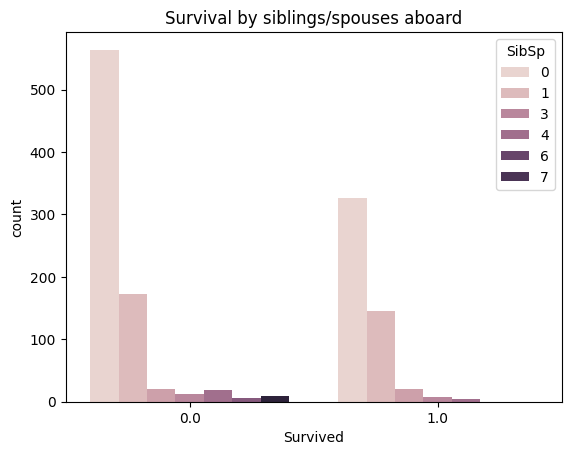

In [28]:
sns.countplot(x='Survived', hue='SibSp', data=df)
plt.title('Survival by siblings/spouses aboard')
plt.show()

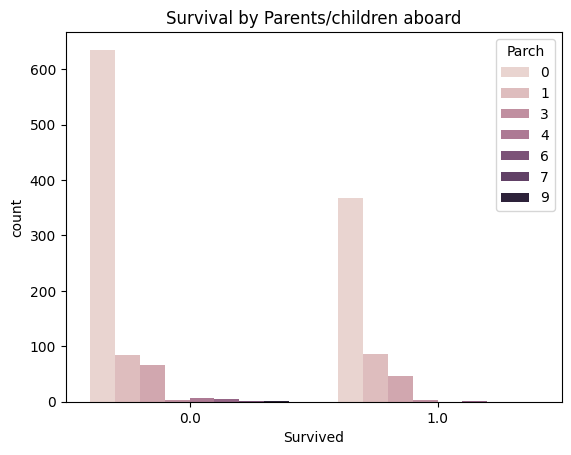

In [29]:
sns.countplot(x='Survived', hue='Parch', data=df)
plt.title('Survival by Parents/children aboard')
plt.show()

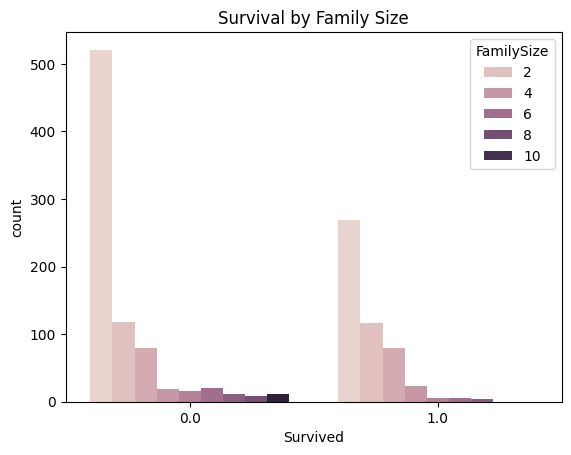

In [30]:
sns.countplot(x='Survived', hue='FamilySize', data=df)
plt.title('Survival by Family Size')
plt.show()

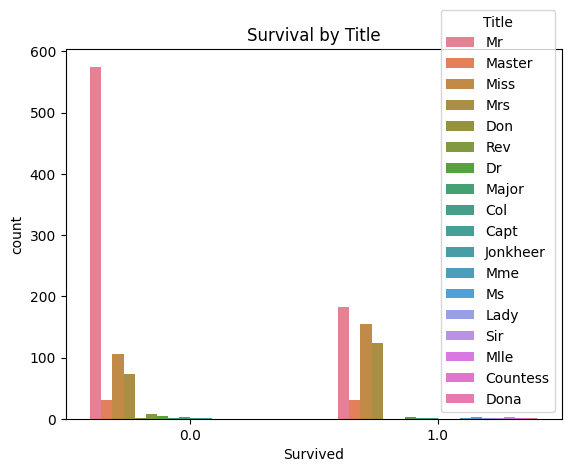

In [31]:
df['Title']=df['Name'].str.extract('([A-Za-z]+)\.', expand=False)
sns.countplot(x='Survived',hue='Title', data=df)
plt.title('Survival by Title')
plt.show()

In [39]:

survival_rate=df.groupby(['Pclass','Sex'])['Survived'].mean().reset_index()

In [42]:

survival_rate_age=df.groupby('AgeGroup')['Survived'].mean().reset_index()

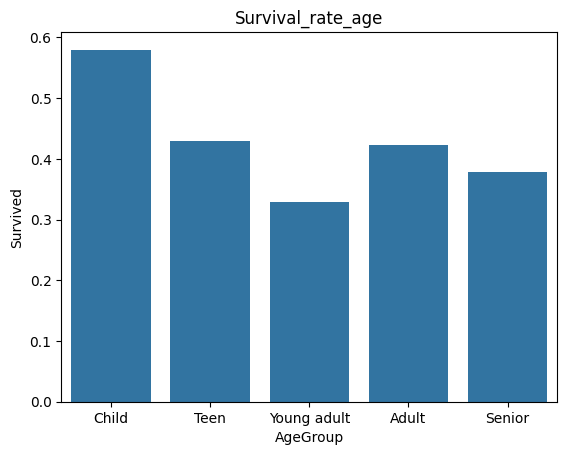

In [43]:
sns.barplot(x='AgeGroup', y='Survived', data=survival_rate_age)
plt.title('Survival_rate_age')
plt.show()

In [46]:
corr_matrix=df.corr(numeric_only = True)

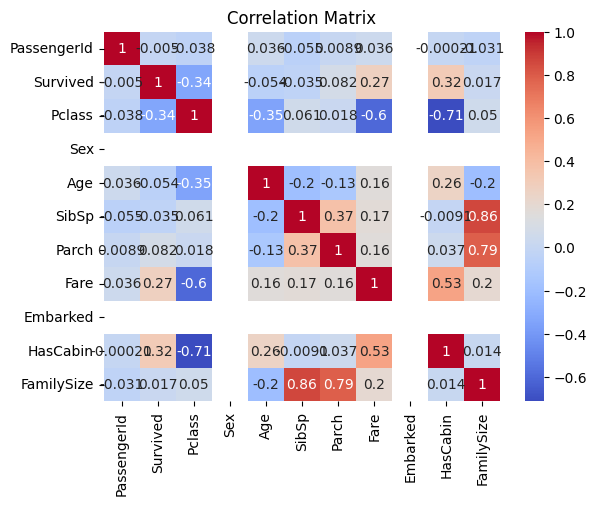

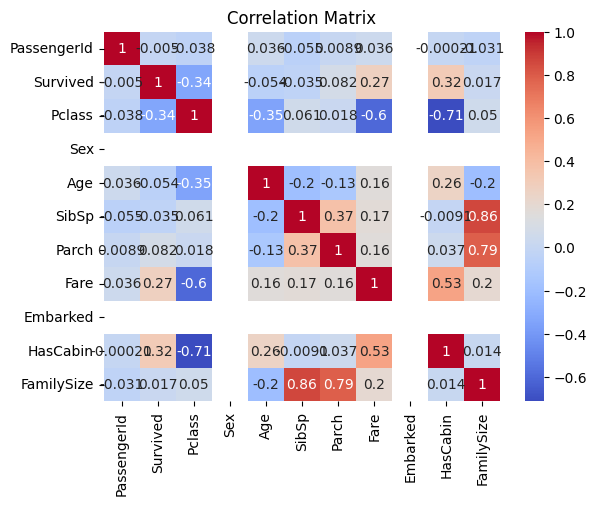

In [47]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# END OF THE TASK 2